In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=120

from exact import mag_map_exact
from pure_shear import mag_map_shear

Note: this implementation has not been fully optimized, and is primarily for the purpose of experimentation and reproduction of results in Zhang 2022 ("Analytic Simplifications to Planetary Microlensing under the Generalized Perturbative Picture"). The wall-time is for illustration only.

## Exact semi-analytic solution

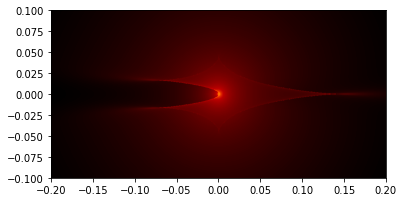

In [2]:
x_grid, y_grid = np.linspace(-0.2,0.2,500), np.linspace(-0.1,0.1,500)
result = mag_map_exact(1, 1e-3, x_grid, y_grid, n_max=10,laguerre=True)
plt.imshow(np.log10(result), cmap='gist_heat', extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()))

In [3]:
%timeit mag_map_exact(1, 1e-3, x_grid, y_grid, n_max=10,laguerre=False)

936 ms ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit mag_map_exact(1, 1e-3, x_grid, y_grid, n_max=10,laguerre=True)

840 ms ± 32.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Pure-shear (approximate analytic)

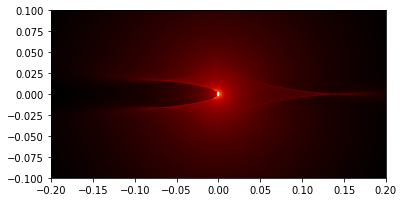

In [5]:
x_grid, y_grid = np.linspace(-0.2,0.2,500), np.linspace(-0.1,0.1,500)
result = mag_map_shear(1, 1e-3, x_grid, y_grid)
plt.imshow(np.log10(result), cmap='gist_heat', extent=(x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()))

note: the bright feature at the center is caused by a negative magnification artifact (see Section 3 of Zhang 2022)

In [6]:
%timeit mag_map_shear(1, 1e-3, x_grid, y_grid)

259 ms ± 10 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
